## ライブラリインストール

In [12]:
%pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 18.7 MB/s eta 0:00:0031m18.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.1 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 19.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 2.2 パーセプトロン

In [15]:
import numpy as np

class Perceptron:
    """
    パーセプトロン分類器

    パラメータ
    - eta: float
        - 学習率
    - n_iter: int
        - 訓練データの訓練回数
    - random_state: int
        - 重みを初期化する際の乱数シード
    
    属性
    - w_: 1次元配列
        - 適合後の重み
    - b_: スカラー
        - 適合後のバイアスユニット
    - errors_: リスト
        - 各エポックでの誤分類（更新）の数
    """

    def __init__(self, eta: float = 0.01, n_iter: int = 50, random_state: int = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        訓練データに適合させる

        パラメータ
        - X: 配列のようなデータ構造
            - shape = [n_examples, n_features]
            - 訓練ベクトル: n_examplesは訓練データの個数, n_featuresは特徴量の個数
        - y: 配列のようなデータ構造
            - shape ~ [n_examples]
            - 目的変数

        戻り値
        - self: object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X: np.ndarray) -> np.ndarray:
        """総入力を計算"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X: np.ndarray) -> int:
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [10]:
import os
import pandas as pd

s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
print("From URL:", s)

df = pd.read_csv(s, header=None, encoding="utf-8")
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Matplotlib is building the font cache; this may take a moment.


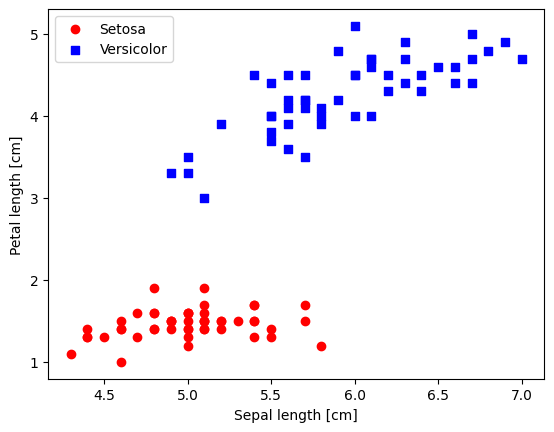

In [13]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="s", label="Versicolor")

plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.show()

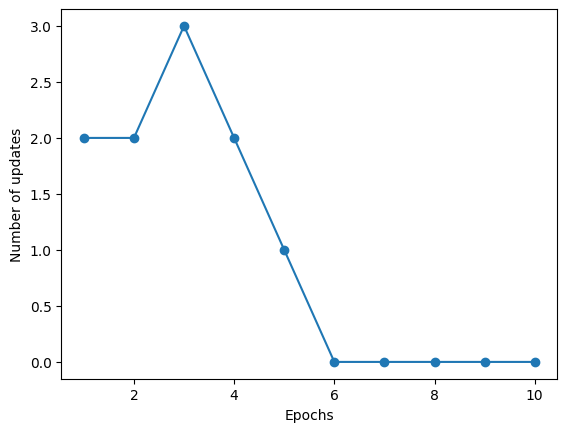

In [16]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X: np.ndarray, y: np.ndarray, classifier: Perceptron, resolution: float = 0.02):
    # マーカーとカラーマップの準備
    markers = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution), 
        np.arange(x2_min, x2_max, resolution)
    )

    # 各特徴量を1次元配列に変換して予測を実行
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    # 予測結果を元のグリッドポイントのデータサイズに変換
    lab = lab.reshape(xx1.shape)

    # グリッドポイントの等高線をプロット
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y==cl, 0],
            y=X[y==cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f"Class {cl}",
            edgecolors="black"
        )

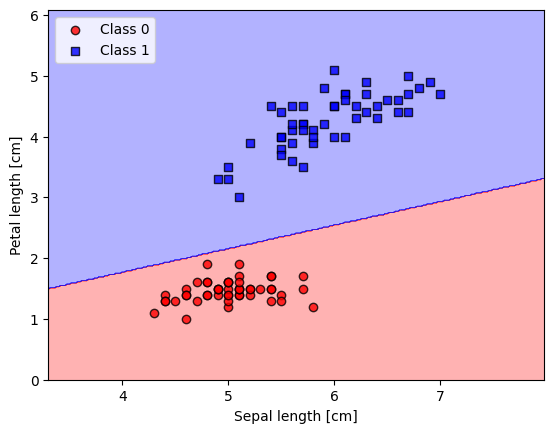

In [18]:
# 決定領域のプロット
plot_decision_regions(X, y, classifier=ppn)

# 軸のラベルの設定
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")

# 凡例の設定（左上に配置）
plt.legend(loc="upper left")

# 図の表示
plt.show()

## 2.3 ADALINE

In [19]:
class AdalineGD:
    """
    ADAptive LInear NEuron分類器

    パラメータ
    - eta: float
        - 学習率
    - n_iter: int
        - 訓練データの訓練回数
    - random_state: int
        - 重みを初期化する際の乱数シード

    属性
    - w_: 一次元配列
        - 適合後の重み
    - b_: スカラー
        - 適合後のバイアス
    - losses_: リスト
        - 各エポックでのMSE誤差関数の値
    """

    def __init__(self, eta: float = 0.01, n_iter: int = 50, random_state: int = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        訓練データに適合させる

        パラメータ
        - X: 配列のようなデータ構造
            - shape = [n_examples, n_features]
            - 訓練データ
            - n_examplesは訓練データの個数, n_featuresは特徴量の個数
        - y: 配列のようなデータ構造
            - shape = [n_features]
            - 目的変数

        戻り値
        - self: object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * errors.T @ X / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        
        return self
    
    def net_input(self, X: np.ndarray):
        return np.dot(X, self.w_) + self.b_
        
    # ADALINEの活性化関数は単なる恒等関数だが、ロジスティック回帰などはシグモイド関数に変更可
    def activation(self, X: np.ndarray):
        return X
    
    def predict(self, X: np.ndarray):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

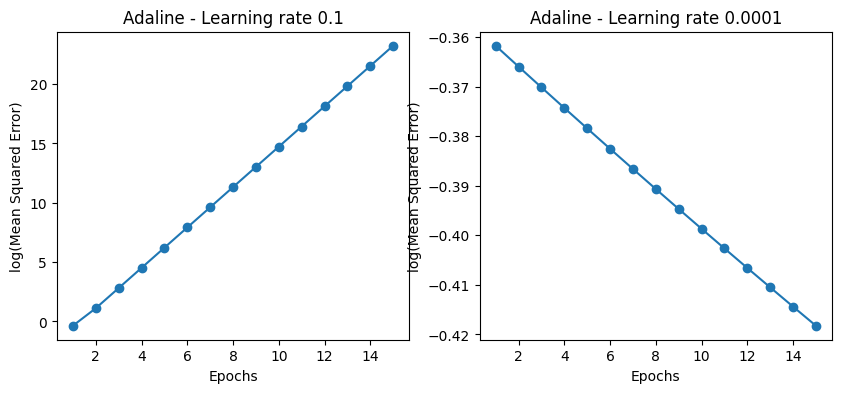

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Mean Squared Error)")
ax[0].set_title("Adaline - Learning rate 0.1")

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), np.log10(ada2.losses_), marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(Mean Squared Error)")
ax[1].set_title("Adaline - Learning rate 0.0001")

plt.show()

In [21]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

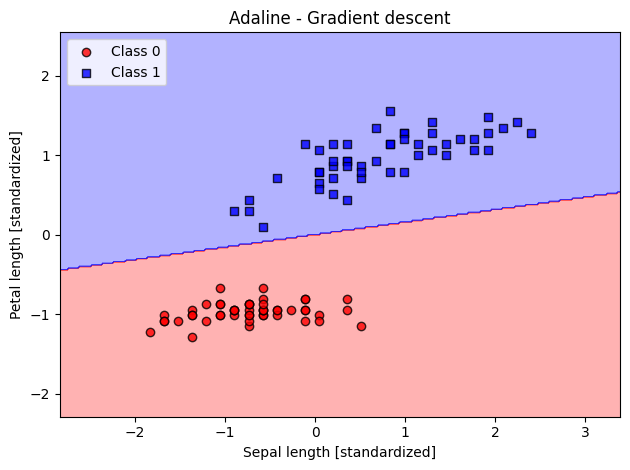

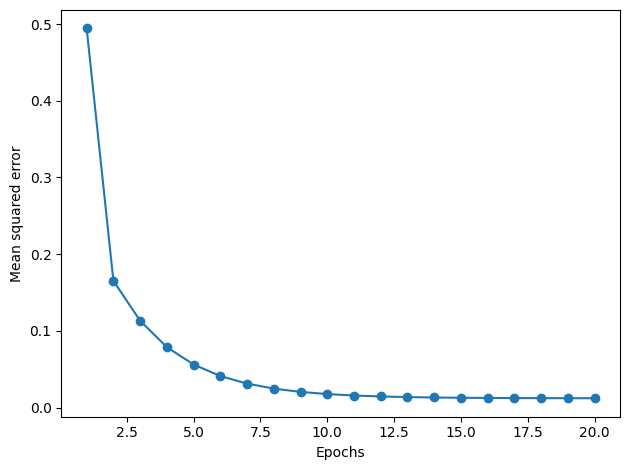

In [29]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title("Adaline - Gradient descent")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Mean squared error")
plt.tight_layout()
plt.show()

In [27]:
class AdalineSGD:
    """
    ADAptive LInear NEuron分類器

    パラメータ
    - eta: float
        - 学習率
    - n_iter: int
        - 訓練データの訓練回数
    - shuffle: bool
        - Trueの場合は循環を回避するためにエポックごとに訓練データをシャッフル
    - random_state: int
        - 重みを初期化する際の乱数シード

    属性
    - w_: 一次元配列
        - 適合後の重み
    - b_: スカラー
        - 適合後のバイアス
    - losses_: リスト
        - 各エポックでのMSE誤差関数の値
    """

    def __init__(self, eta: float = 0.01, n_iter: int = 10, shuffle: bool = True, random_state: int = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        訓練データに適合させる

        パラメータ
        - X: 配列のようなデータ構造
            - shape = [n_examples, n_features]
            - 訓練データ
            - n_examplesは訓練データの個数, n_featuresは特徴量の個数
        - y: 配列のようなデータ構造
            - shape = [n_features]
            - 目的変数

        戻り値
        - self: object
        """

        self._initialize_weights(X.shape[1])
        self.losses_ = []

        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)

            # 各データに対して損失を計算していて、1 epochでの損失は平均値を使用
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        
        return self
    
    def partial_fit(self, X: np.ndarray, y: np.ndarray):
        """重みを再初期化せずに訓練データに適合させる"""

        if not self.w_initialized:
            self._initialize_weights(X.shape[1])

        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        
        return self
    
    def _shuffle(self, X: np.ndarray, y: np.ndarray):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m: int):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float64(0.)
        self.w_initialized = True
    
    def _update_weights(self, xi: np.ndarray, target: np.ndarray):
        """ADALINEの学習規則を使って重みを更新"""

        net_input = self.net_input(xi)
        output = self.activation(net_input)
        error = (target - output)
        self.w_ += self.eta * 2.0 * error * xi
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        
        return loss

    def net_input(self, X: np.ndarray):
        return np.dot(X, self.w_) + self.b_
        
    # ADALINEの活性化関数は単なる恒等関数だが、ロジスティック回帰などはシグモイド関数に変更可
    def activation(self, X: np.ndarray):
        return X
    
    def predict(self, X: np.ndarray):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

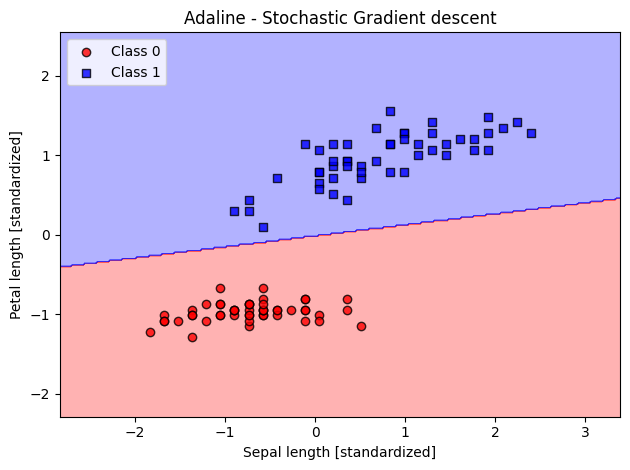

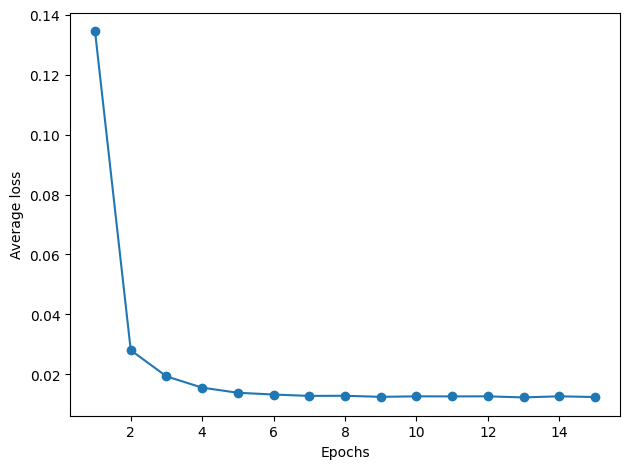

In [31]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("Adaline - Stochastic Gradient descent")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Average loss")
plt.tight_layout()
plt.show()